In [1]:
!pip install git+https://github.com/robmarkcole/HASS-data-detective.git --upgrade

  Cloning https://github.com/robmarkcole/HASS-data-detective.git to /tmp/pip-req-build-wbzasitx
  Running command git clone -q https://github.com/robmarkcole/HASS-data-detective.git /tmp/pip-req-build-wbzasitx
  Created wheel for HASS-data-detective: filename=HASS_data_detective-2.4-cp36-none-any.whl size=7672 sha256=e71f6419b28519ab7f3f4a86e7384693ad1e62115746e0982ca56f435ed01aae
  Stored in directory: /tmp/pip-ephem-wheel-cache-c621oaj1/wheels/1f/6c/2e/cf6ed0907cfc8fe055ce74b2e4b6e3f45ccb1632a3940739a5
Successfully built HASS-data-detective
  Found existing installation: HASS-data-detective 1.0
    Uninstalling HASS-data-detective-1.0:
      Successfully uninstalled HASS-data-detective-1.0
You should consider upgrading via the 'pip install --upgrade pip' command.


In [9]:
from detective.core import db_from_hass_config
import pandas as pd
db = db_from_hass_config()

Successfully connected to database sqlite:////config/home-assistant_v2.db
There are 368 entities with data


In [10]:
d = db.fetch_all_sensor_data(limit=None)

The returned Pandas dataframe has 360728 rows of data.


In [11]:
def get_hour_plot(d: pd.DataFrame, name: str):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))

    d2.resample('2H', on='last_changed').state.mean().plot(label=name)

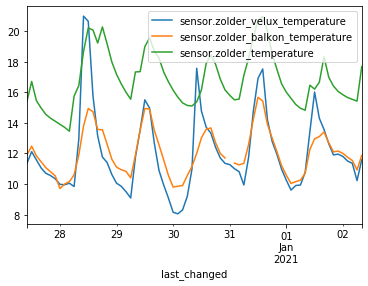

In [12]:
import matplotlib.pyplot as plt
get_hour_plot(d, 'sensor.zolder_velux_temperature')
get_hour_plot(d, 'sensor.zolder_balkon_temperature')
get_hour_plot(d, 'sensor.zolder_temperature')
plt.legend()

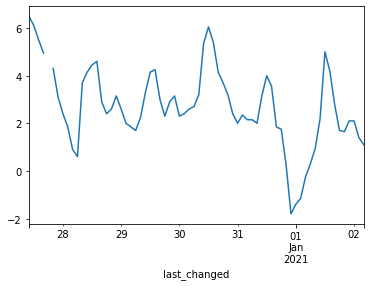

In [13]:
get_hour_plot(d, 'sensor.outside_temperature')

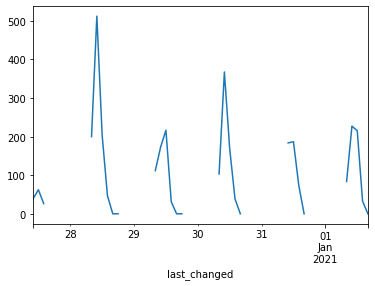

In [14]:
get_hour_plot(d, 'sensor.growatt_total_output_power')

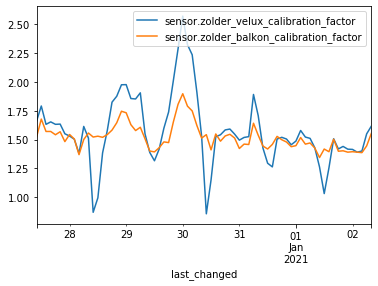

In [15]:
get_hour_plot(d, 'sensor.zolder_velux_calibration_factor')
get_hour_plot(d, 'sensor.zolder_balkon_calibration_factor')
plt.legend()

In [21]:
def get_mean(d: pd.DataFrame, name: str):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))

    return d2.resample('2H', on='last_changed').state.mean().agg(['mean', 'std'])

In [22]:
get_mean(d, 'sensor.zolder_velux_calibration_factor')

mean    1.571778
std     0.301739
Name: state, dtype: float64

In [23]:
get_mean(d, 'sensor.zolder_balkon_calibration_factor')

mean    1.519856
std     0.111174
Name: state, dtype: float64

In [24]:
def get_hour_plot(d: pd.DataFrame, name: str, min_=1.25, max_=2):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))
    d2 = d2[(d2['state'] > min_) & (d2['state'] < max_)]

    d2.resample('2H', on='last_changed').state.mean().plot(label=name)

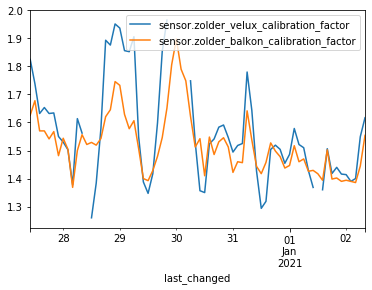

In [25]:
get_hour_plot(d, 'sensor.zolder_velux_calibration_factor')
get_hour_plot(d, 'sensor.zolder_balkon_calibration_factor')
plt.legend()

In [26]:
def get_mean(d: pd.DataFrame, name: str, min_=1.25, max_=2):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))
    d2 = d2[(d2['state'] > min_) & (d2['state'] < max_)]

    return d2.resample('H', on='last_changed').state.mean().agg(['mean', 'std'])

In [27]:
get_mean(d, 'sensor.zolder_velux_calibration_factor')

mean    1.557284
std     0.181149
Name: state, dtype: float64

In [28]:
get_mean(d, 'sensor.zolder_balkon_calibration_factor')

mean    1.521368
std     0.115038
Name: state, dtype: float64

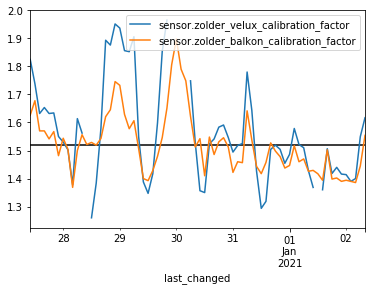

In [34]:
get_hour_plot(d, 'sensor.zolder_velux_calibration_factor')
get_hour_plot(d, 'sensor.zolder_balkon_calibration_factor')
plt.hlines(1.521368, 0, 1e10)
plt.legend()

In [35]:
def get_hour_plot(d: pd.DataFrame, name: str):
    d['last_changed'] = pd.to_datetime(d['last_changed'])

    d2 = d[d['entity_id'] == name]
    d2 = d2.astype(dict(state=float))

    d2.resample('2H', on='last_changed').state.mean().plot.bar(label=name)

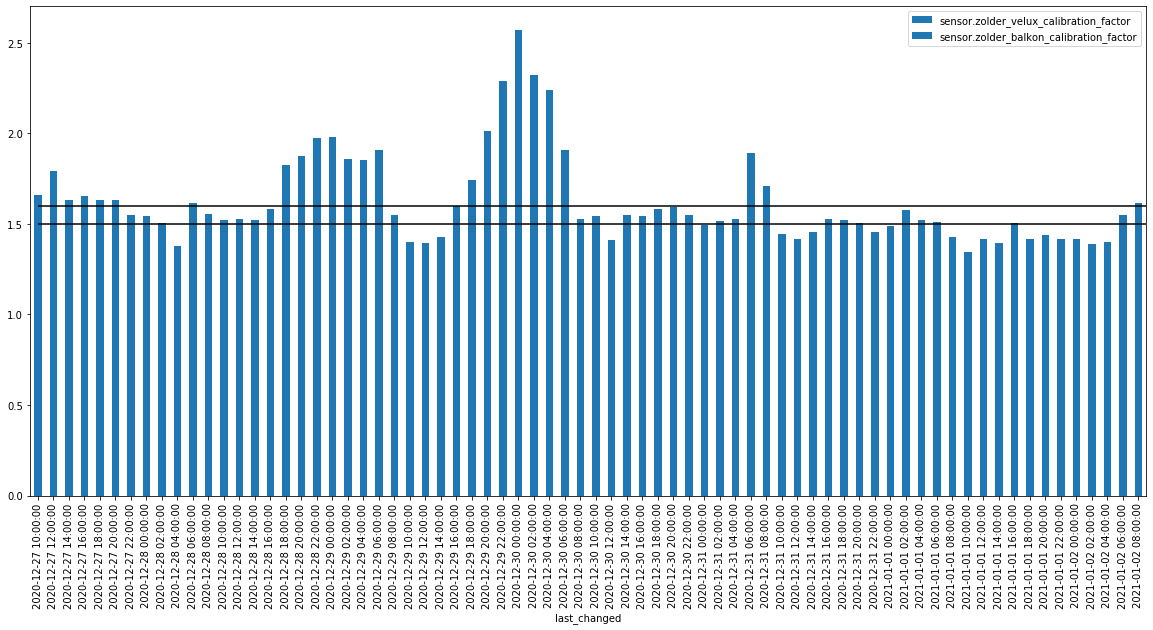

In [40]:
plt.figure(figsize=(20, 9))
get_hour_plot(d, 'sensor.zolder_velux_calibration_factor')
get_hour_plot(d, 'sensor.zolder_balkon_calibration_factor')
plt.hlines(1.5, 0, 1e10)
plt.hlines(1.6, 0, 1e10)
plt.legend()